## Neural Network Train

In [13]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [15]:
!pip3 install ann_visualizer
!pip3 install graphviz

In [30]:
!pip install visualkeras
!pip install pillow  # image rendering


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 19.9 MB/s eta 0:00:00


In [16]:
from ann_visualizer.visualize import ann_viz
from graphviz import Source

In [17]:
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[0],[1],[1],[0]], "float32")

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(2,)))  # 2 inputs for XOR
model.add(keras.layers.Dense(4, input_dim=2, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [43]:
# Train with verbose=1 to see progress
model.fit(training_data, target_data, epochs=200, verbose=1)


# 6. Visualize the Neural Network
# ann_viz(model, title="Simple XOR Classifier", view=True)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 0.2490
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.5000 - loss: 0.2490
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5000 - loss: 0.2490
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5000 - loss: 0.2490
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5000 - loss: 0.2490
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5000 - loss: 0.2490
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 0.2490
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5000 - loss: 0.2489
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5000 - loss: 0.2489
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5000 - loss: 0.2489
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5000 - loss: 0.2489
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0

In [44]:
# 6. Evaluate the model
loss, accuracy = model.evaluate(training_data, target_data)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - loss: 0.2464
Loss: 0.24638688564300537
Accuracy: 0.75


In [45]:
# 7. Make predictions on the training data
predictions = model.predict(training_data)
print("Predictions (rounded):")
print(np.round(predictions))  # rounding the predictions to get binary output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predictions (rounded):
[[0.]
 [1.]
 [1.]
 [1.]]


In [46]:
print("Actual outputs:")
print(target_data)


Actual outputs:
[[0.]
 [1.]
 [1.]
 [0.]]


## Forget plot

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning:

The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.



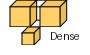

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import visualkeras
from PIL import ImageFont
from IPython.display import Image, display

import visualkeras
from PIL import ImageFont
try:
    font = ImageFont.truetype("arial.ttf", 14)
except:
    font = None
# Generate the image and show it inline
img = visualkeras.layered_view(model, legend=True, font=font)
img.save("xor_model.png")  # Save the image
display(Image(filename="xor_model.png"))  # Show it in notebook

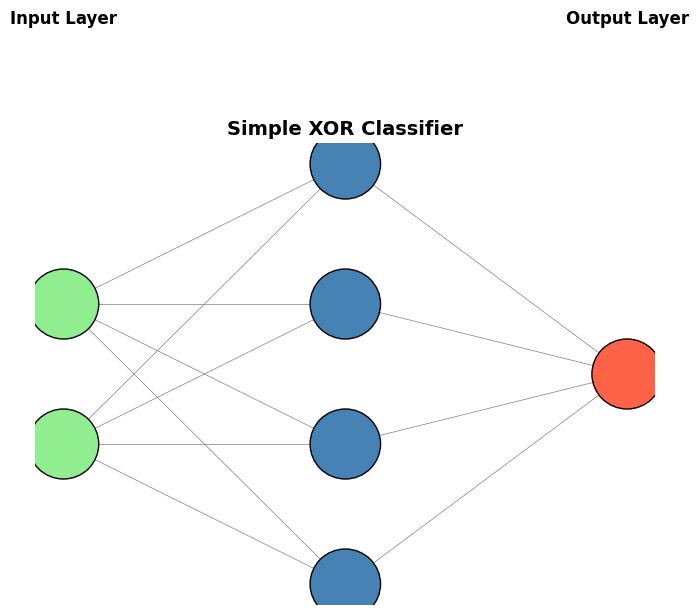

In [36]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_labels=None):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(n_layers - 1)

    # Store neuron coordinates
    neuron_positions = []

    # Nodes
    for i in range(n_layers):
        layer_size = layer_sizes[i]
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom)/2.
        layer_pos = []
        for j in range(layer_size):
            x = left + i * h_spacing
            y = layer_top - j * v_spacing
            layer_pos.append((x, y))
            color = '#90ee90' if i == 0 else '#4682B4' if i < n_layers - 1 else '#ff6347'
            circle = plt.Circle((x, y), 0.05, color=color, ec='black', zorder=4)
            ax.add_artist(circle)
        neuron_positions.append(layer_pos)

    # Connections
    for i in range(n_layers - 1):
        for a in neuron_positions[i]:
            for b in neuron_positions[i + 1]:
                ax.plot([a[0], b[0]], [a[1], b[1]], 'gray', linewidth=0.5)

    # Layer labels
    if layer_labels:
        for i, label in enumerate(layer_labels):
            x = left + i * h_spacing
            ax.text(x, top + 0.1, label, fontsize=12, ha='center', fontweight='bold')

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, [2, 4, 1], layer_labels=["Input Layer", "", "Output Layer"])
plt.title("Simple XOR Classifier", fontsize=14, weight='bold')
plt.show()
